## Libraries

In [3]:
import numpy as np 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## Dataset

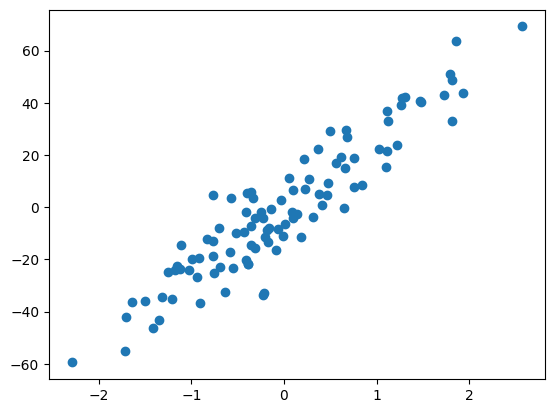

In [20]:
samples, targets = make_regression(n_samples=100, n_features=1, noise=10)
# dataset ploting
plt.scatter(samples,targets)

## Vérification des matrices

In [27]:
print("samples Dimension => ",samples.shape)
samples
targets = targets.reshape(targets.shape[0],1)
print("targets Dimension => ",targets.shape)
targets

samples Dimension =>  (100, 1)
targets Dimension =>  (100, 1)


array([[ 33.12144678],
       [  6.43272367],
       [  5.15796344],
       [ 16.95391286],
       [-55.28298518],
       [-14.4378417 ],
       [ -4.0329576 ],
       [ 32.88229365],
       [ 14.93858262],
       [ -7.39009427],
       [-23.64017288],
       [-35.31919433],
       [  8.5425413 ],
       [-17.2486493 ],
       [ 48.5393991 ],
       [  3.3222523 ],
       [-33.67562718],
       [  3.30843244],
       [ 29.16508508],
       [-15.63465954],
       [ 40.1090275 ],
       [-43.34098908],
       [  7.85112872],
       [-22.45070447],
       [-36.63872728],
       [ -3.80287682],
       [ 42.84932647],
       [ 27.04117364],
       [ 29.35876153],
       [  0.93846975],
       [ -6.30203243],
       [ 21.33153911],
       [-36.17942689],
       [-23.9594684 ],
       [-26.64600261],
       [ 18.62057911],
       [ -1.97083474],
       [ -1.90042579],
       [-21.680954  ],
       [-35.96666682],
       [-24.81890753],
       [ 18.67177507],
       [-18.59709113],
       [ 10

### X_samples

In [26]:
X_samples = np.hstack((samples, np.ones(samples.shape)))
print("X_samples dimension =>", X_samples.shape)
X_samples

X_samples dimension => (100, 2)


array([[ 1.12266397,  1.        ],
       [ 0.10126925,  1.        ],
       [ 0.37834146,  1.        ],
       [ 0.56220969,  1.        ],
       [-1.71703797,  1.        ],
       [-0.35154729,  1.        ],
       [-0.3132064 ,  1.        ],
       [ 1.8168649 ,  1.        ],
       [ 0.65878411,  1.        ],
       [-0.35750309,  1.        ],
       [-1.12446162,  1.        ],
       [-1.21018046,  1.        ],
       [ 0.84121091,  1.        ],
       [-0.58286725,  1.        ],
       [ 1.81616207,  1.        ],
       [-0.57531779,  1.        ],
       [-0.22849679,  1.        ],
       [-0.33391402,  1.        ],
       [ 0.50018869,  1.        ],
       [-0.3160772 ,  1.        ],
       [ 1.48146678,  1.        ],
       [-1.34455647,  1.        ],
       [ 0.7512792 ,  1.        ],
       [-1.15609409,  1.        ],
       [-0.90676416,  1.        ],
       [ 0.31563391,  1.        ],
       [ 1.7300138 ,  1.        ],
       [ 0.68345996,  1.        ],
       [ 0.67124818,

## Les paramètres

In [30]:
theta = np.random.randn(2,1)
theta

array([[ 0.26034579],
       [-0.72353766]])

## Modèles (Modèle linéaire)

In [34]:
def model(x_samples,parameters):
    return x_samples.dot(parameters)

## Test

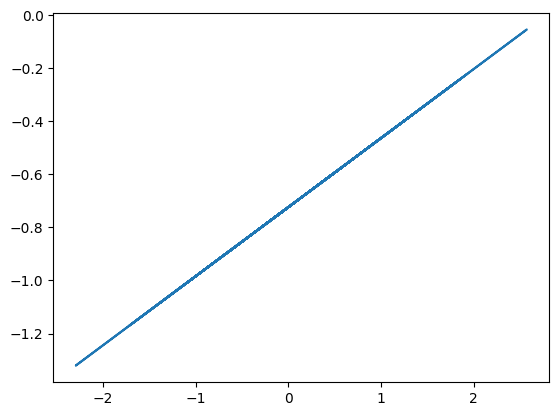

In [37]:
plt.plot(samples, model(x_samples=X_samples,parameters=theta))


## Comparaison au résultat recherché

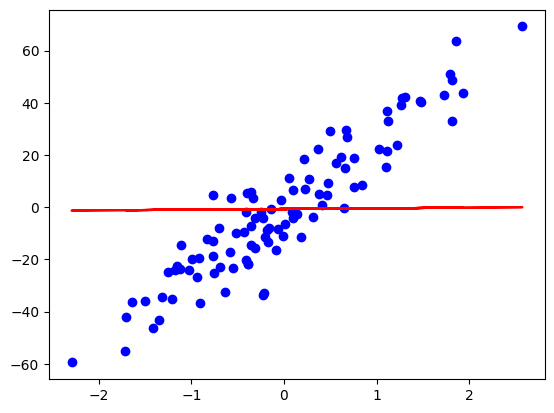

In [57]:
plt.scatter(samples ,targets ,c="b")
plt.plot(samples, model(x_samples=X_samples,parameters=theta) ,c="r")

## Fonction coût

In [42]:
def cost_function(x_samples,parameters,y_targets):
    m = len(y_targets)
    sigma_sum = np.sum((model(x_samples=x_samples,parameters=parameters) - y_targets)**2)
    return 1/(2*m) * sigma_sum

## Test

In [47]:
print("Cost => ",cost_function(X_samples,theta,targets))

Cost =>  338.0876269998123


## Calcules de dérivation des sample values 

In [51]:
def derive(x_samples,y_targets,parameters):
    m = len(y_targets)
    return 1/m * x_samples.T.dot(model(x_samples=x_samples,parameters=parameters) - y_targets)

## Algorithme de minimisation soit Descente de gradient (Gradient Descent)

In [66]:
def gradient_descent(learning_rate, x_samples, y_targets, parameters, n_iterations):
    cost_history = np.zeros(n_iterations)    
    for i in range(0,n_iterations):
        parameters = parameters - learning_rate * derive(x_samples=x_samples,y_targets=y_targets,parameters=parameters)
        cost_history[i] = cost_function(x_samples=x_samples,parameters=parameters,y_targets=y_targets) 
    
    return parameters,cost_history

## Recherche des paramètres adequats avec la fonction "gradient_descent"

In [71]:
theta_final, cost_history = gradient_descent(learning_rate =0.01 ,x_samples=X_samples ,y_targets=targets ,parameters=theta , n_iterations=1000 )

print("Result => ", theta_final)

Result =>  [[25.56703505]
 [-0.58306548]]


## Ploting the result

In [72]:
prediction = model(X_samples,theta_final)
print("Prediction => ",prediction)

Prediction =>  [[ 28.12012361]
 [  2.00608911]
 [  9.09000393]
 [ 13.7909694 ]
 [-44.48263547]
 [ -9.57108726]
 [ -8.59082437]
 [ 45.86878304]
 [ 16.26009091]
 [ -9.72335941]
 [-29.33221512]
 [-31.52379182]
 [ 20.9242034 ]
 [-15.48525281]
 [ 45.85081387]
 [-15.29223562]
 [ -6.42505083]
 [ -9.12025696]
 [ 12.20527638]
 [ -8.66422241]
 [ 37.29364748]
 [-34.95938788]
 [ 18.62491626]
 [-30.14096363]
 [-23.76633653]
 [  7.48675778]
 [ 43.64825803]
 [ 16.89097922]
 [ 16.57876036]
 [ 10.03719073]
 [ -0.21900172]
 [ 27.94896358]
 [-42.43358092]
 [-26.77244687]
 [-24.46218667]
 [  4.81639399]
 [  1.57424925]
 [-11.15513591]
 [-10.42581796]
 [-38.88215716]
 [-32.68524608]
 [ 18.67615275]
 [-20.07858545]
 [  6.20753249]
 [-14.64568364]
 [-18.1944163 ]
 [ 30.54050476]
 [-19.80176846]
 [  4.13999054]
 [ -6.99306446]
 [ 15.95728228]
 [-26.00464546]
 [-21.9324556 ]
 [  3.11041687]
 [ 32.10283941]
 [ 45.10723074]
 [ 36.92604095]
 [  8.70191714]
 [  0.82867092]
 [ -4.04961192]
 [ 48.82871096]
 [-20.075

## Comparaison des courbes

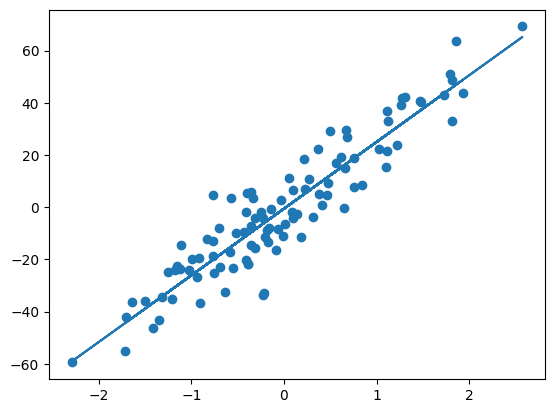

In [73]:
plt.scatter(samples ,targets)
plt.plot(samples ,prediction)

## Observation de l'évolution de l'appratissage (courbe de la fonction coût)

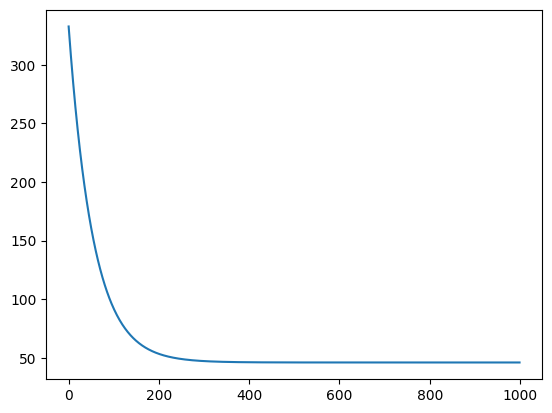

In [74]:
plt.plot(range(1000),cost_history)